# Visualizing and incrementally adding CrossCat models in iventure

__To produce visual rendering of models__
```
usage: %bql .render_crosscat [options] <generator_name> <model_number>

options:
    --subsample=<n>               number of rows to subsample (recommend <50)
    --width=<w>                   width of the figure
    --height=<c>                  height of the figure
    --rowlabels=<colname>         name of the column in the base table to use as row labels
    --progress=[True|False]       show a progress bar?
    --yticklabeslize=<fontsize>   size of the row labels
    --xticklabeslize=<fontsize>   size of the col labels
```

_Note_: To view a figure in full size, right-click and select 'Open in image in new tab'.

__To initialize more models to existing metamdoel__
```
usage: %mml INITIALIZE <n> MODELS IF NOT EXIST FOR <generator_name>

Ensures <generator_name> has at least <n> models in total.

If models [1..<k>] are already initialized for <metamodel_name>, then a new
set of models [<k+1>..<n>] will be initialized and appended to the metamodel.
```

In [1]:
%load_ext iventure.magics
%matplotlib inline

session_id: fsaad@probcomp-1.csail.mit.edu_2017-12-17T11:07:26.638038_0


### Load data table and create a population.

In [2]:
%bayesdb :memory:

u'Loaded: :memory:'

In [3]:
%bql CREATE TABLE satellites_t FROM 'resources/satellites.csv'
%bql .nullify satellites_t NaN

Nullified 3032 cells


In [4]:
%%mml
CREATE POPULATION satellites FOR satellites_t WITH SCHEMA(
    GUESS STATTYPES OF (*);
)

""


### Create a metamodel with 1 model and 50 subsampled satellites.

In [6]:
%mml CREATE GENERATOR satellites_m FOR satellites;

""


In [7]:
%mml INITIALIZE 1 MODELS FOR satellites_m;

""


### Render the CrossCat state as sampled from the prior.

Creating figure...


'ascii' codec can't encode characters in position 5-6: ordinal not in range(128)


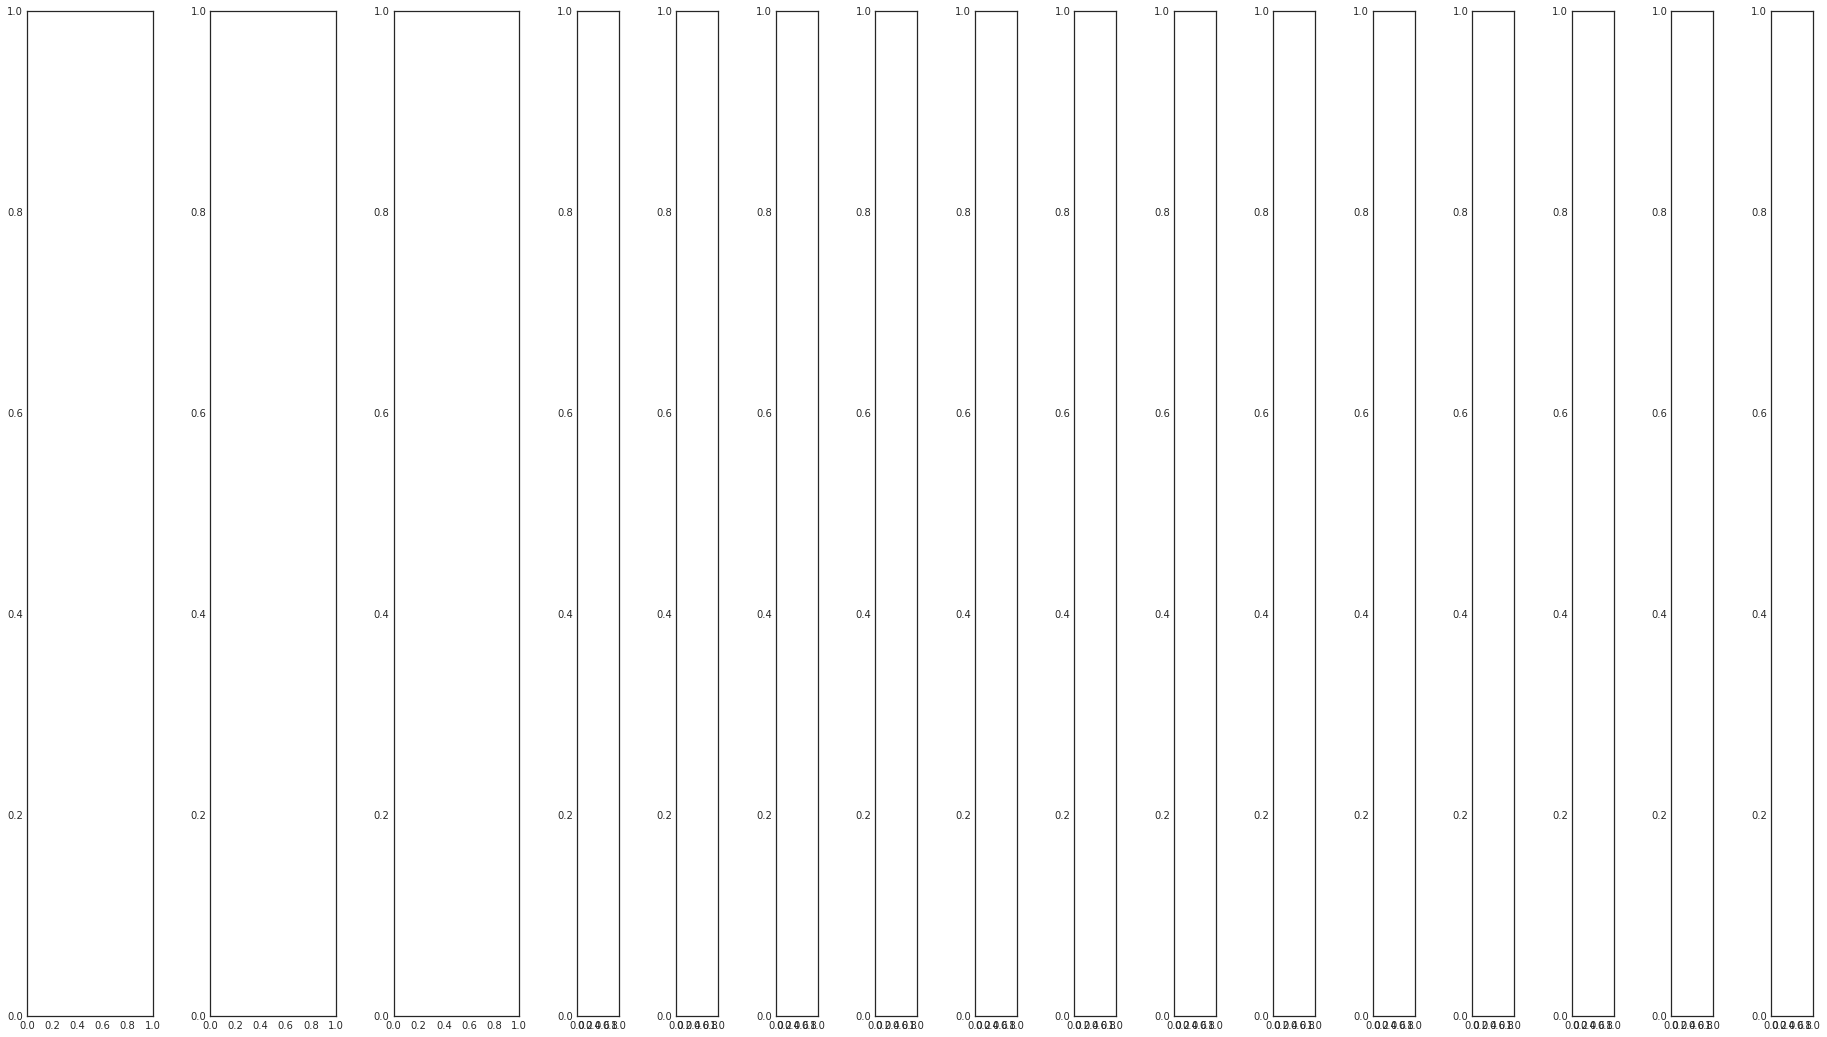

In [8]:
%mml .render_crosscat --progress=True --subsample=50 --rowlabels=Name satellites_m 0

### Show a dependence heatmap from the single model.

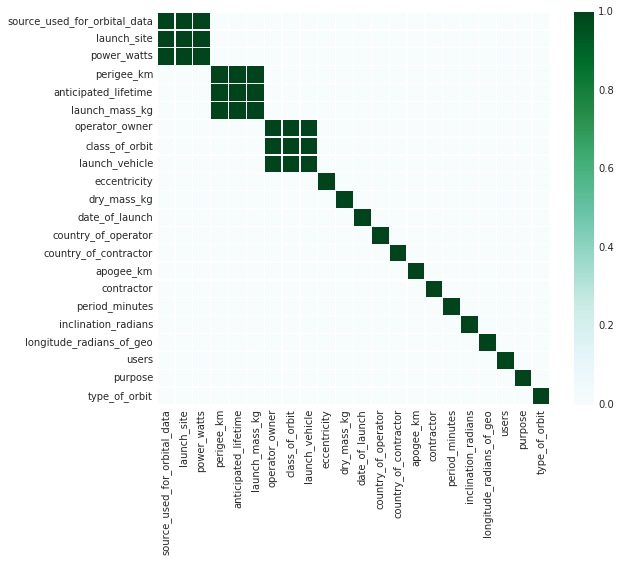

In [9]:
%bql .heatmap ESTIMATE DEPENDENCE PROBABILITY FROM PAIRWISE VARIABLES OF satellites

### Run 250 iterations of analysis (all kernels).

In [10]:
%mml ANALYZE satellites_m FOR 30 SECONDS (OPTIMIZED);

Completed: 59 iterations in 30.256810 seconds.


""


### Render the CrossCat model after analysis and show new dependencies.

Creating figure...


'ascii' codec can't encode characters in position 5-6: ordinal not in range(128)


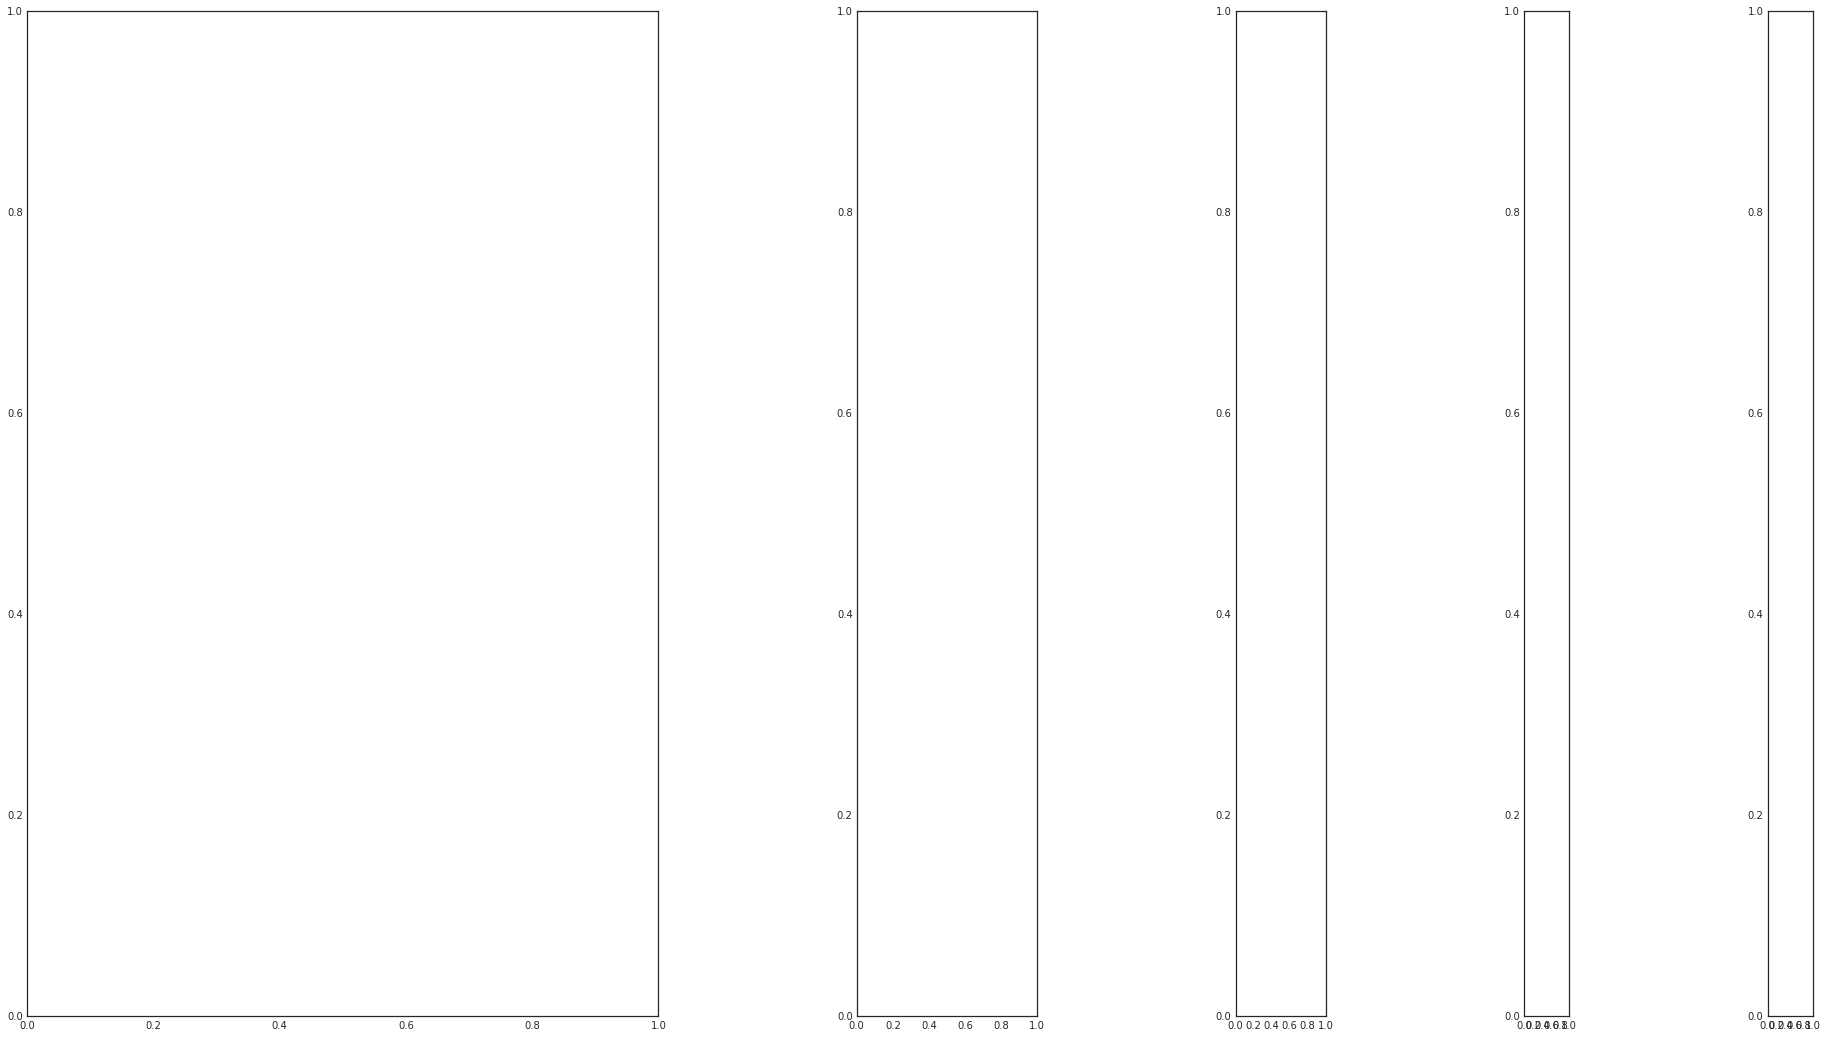

In [11]:
%mml .render_crosscat --subsample=50 --progress=True --yticklabelsize=xx-small --rowlabels=Name satellites_m 0

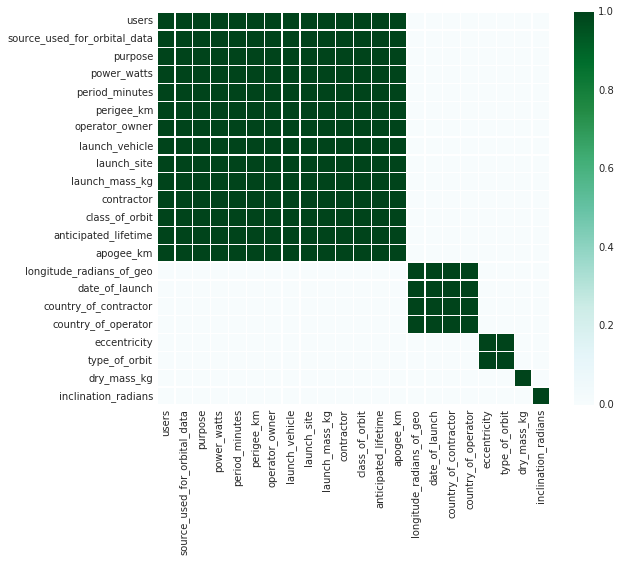

In [12]:
%bql .heatmap ESTIMATE DEPENDENCE PROBABILITY FROM PAIRWISE VARIABLES OF satellites;

### Dependencies and clusters in the view of a fixed variable are specified using --variable=&lt;name&gt;

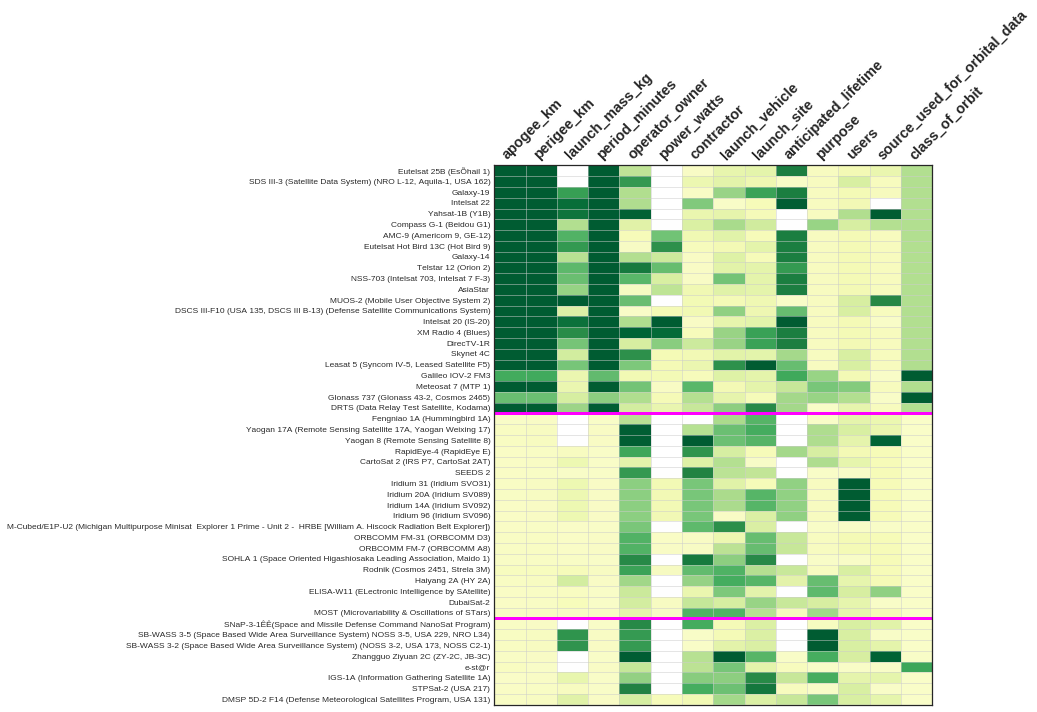

In [13]:
%mml .render_crosscat \
    --subsample=50 --yticklabelsize=small --height=10 --variable=class_of_orbit --rowlabels=Name satellites_m 0

### Initialize 15 more models for the metamodel, and render some models sampled from the prior.

In [14]:
%multiprocess on

Multiprocessing turned on from off.


In [15]:
%mml INITIALIZE 16 MODELS IF NOT EXISTS FOR satellites_m;

""


'ascii' codec can't encode characters in position 5-6: ordinal not in range(128)
'ascii' codec can't encode characters in position 5-6: ordinal not in range(128)
'ascii' codec can't encode characters in position 5-6: ordinal not in range(128)


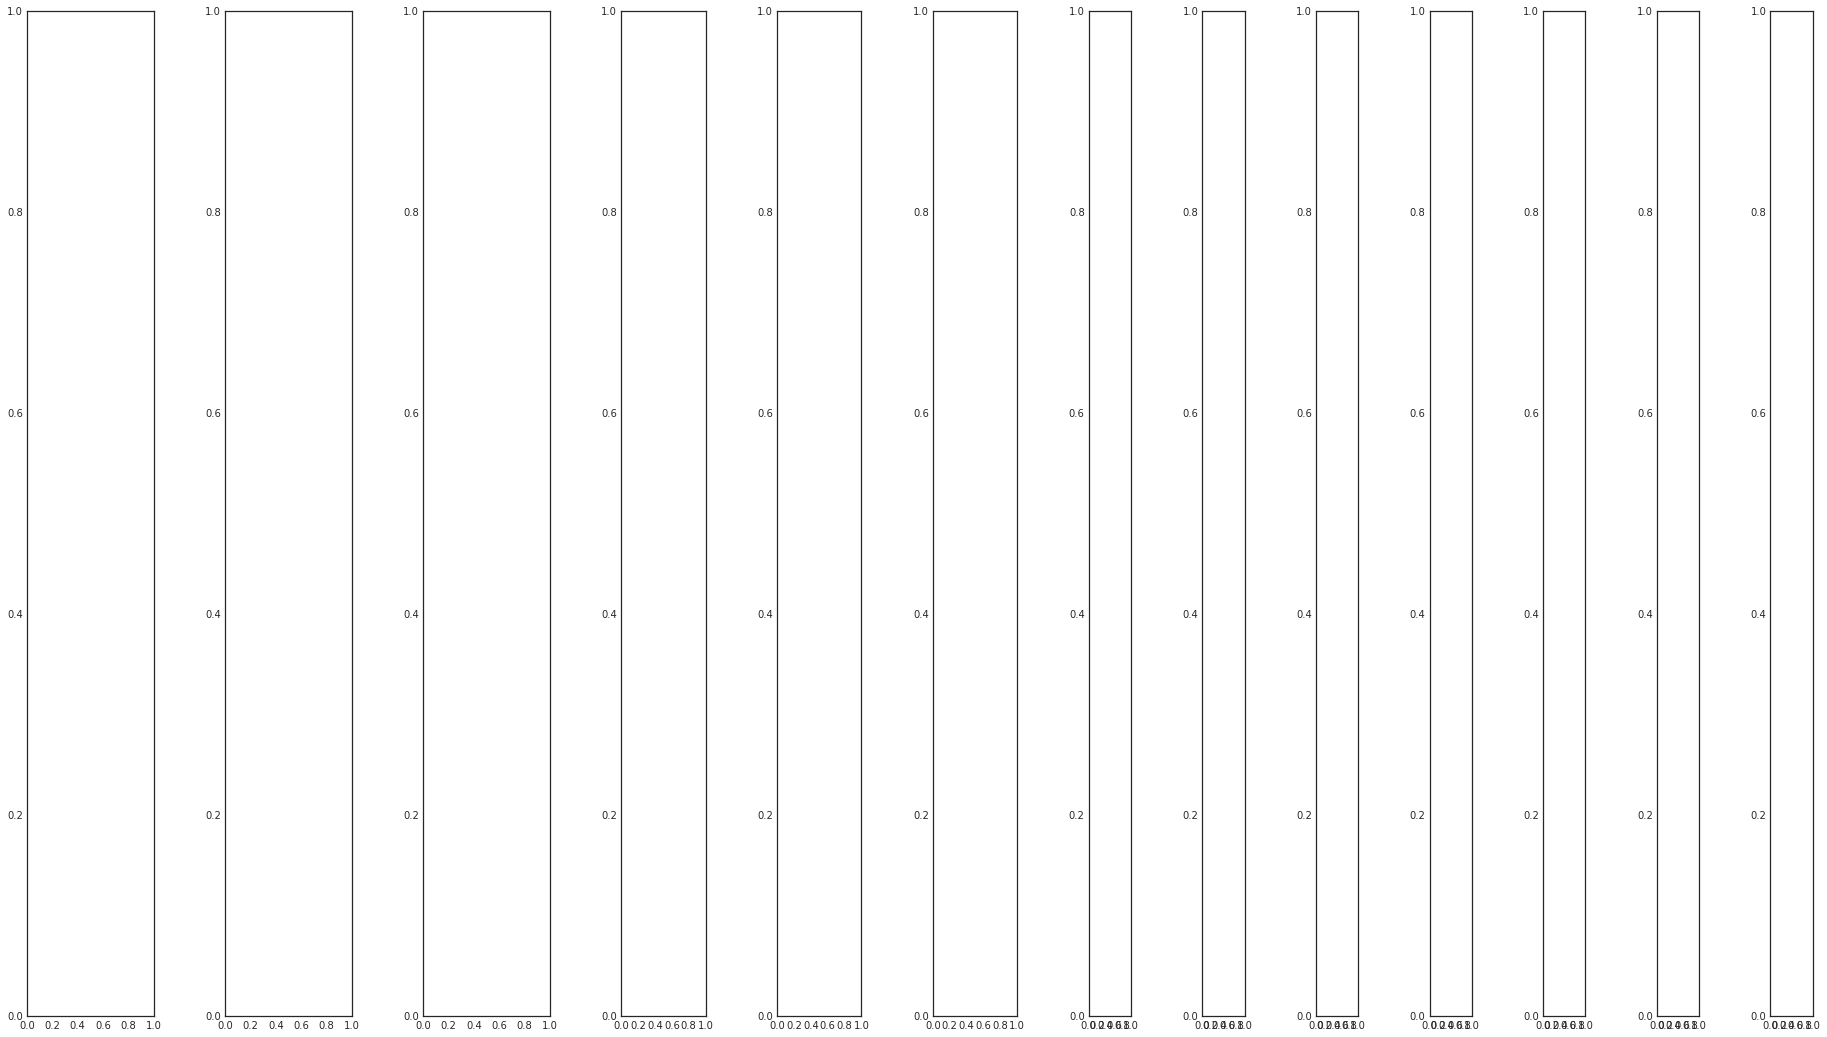

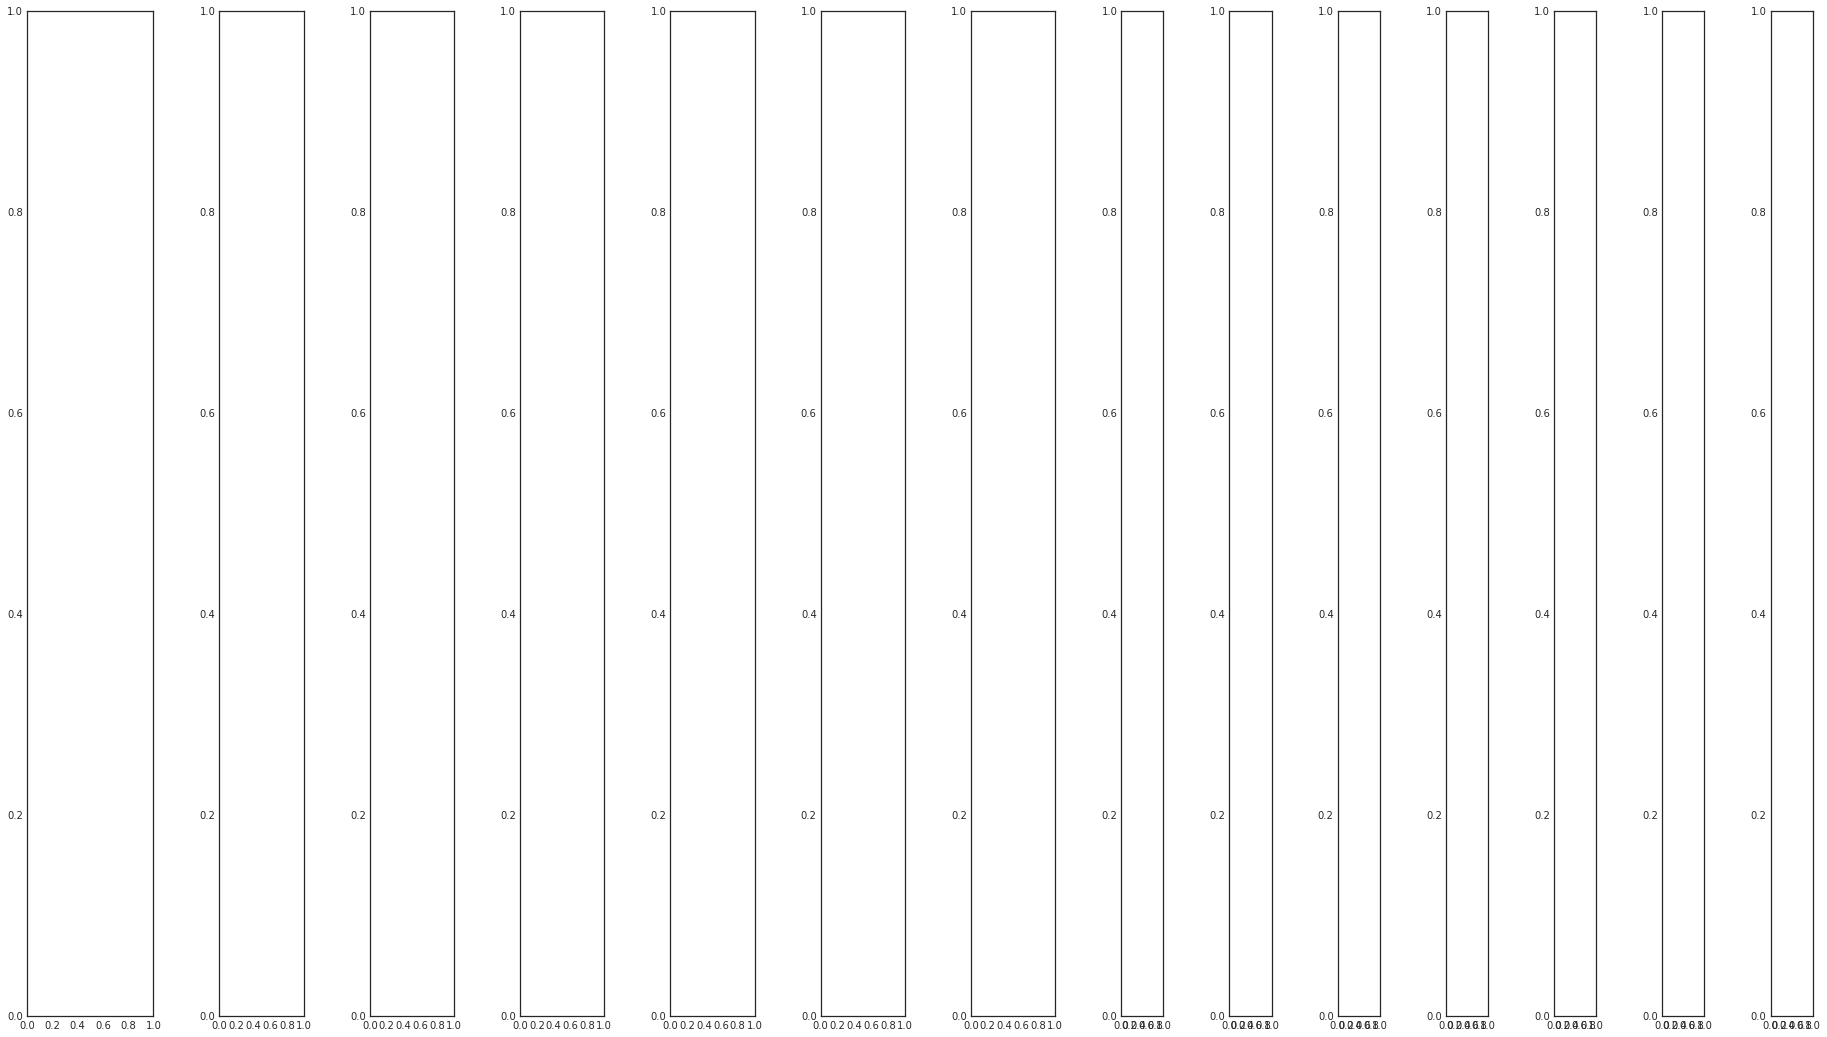

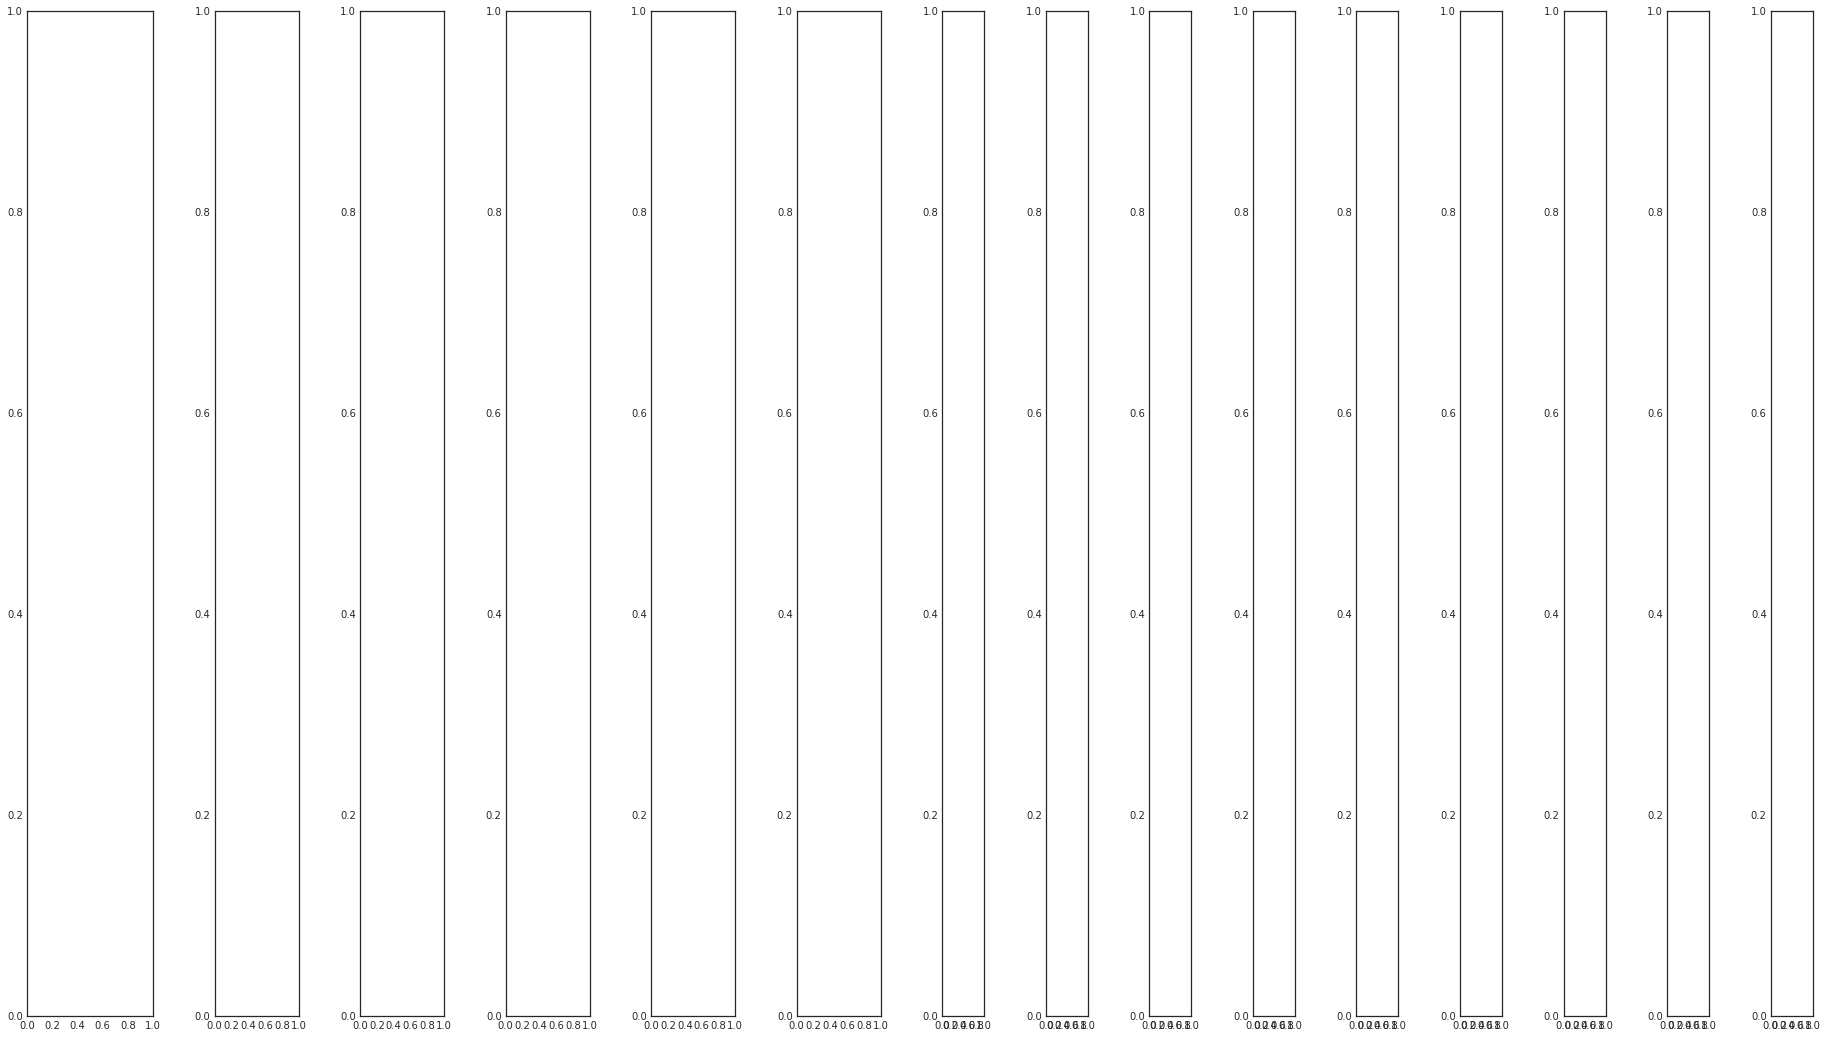

In [16]:
%mml .render_crosscat --subsample=50 --rowlabels=Name satellites_m 2
%mml .render_crosscat --subsample=50 --rowlabels=Name satellites_m 3
%mml .render_crosscat --subsample=50 --rowlabels=Name satellites_m 4

### Run 500 iterations of analysis.

In [17]:
%mml ANALYZE satellites_m FOR 250 ITERATION (OPTIMIZED);

Completed: 250 iterations in 68.803958 seconds.
Completed: 250 iterations in 68.785264 seconds.
Completed: 250 iterations in 73.923930 seconds.
Completed: 250 iterations in 74.483531 seconds.
Completed: 250 iterations in 75.512726 seconds.
Completed: 250 iterations in 76.771478 seconds.
Completed: 250 iterations in 77.485278 seconds.
Completed: 250 iterations in 78.461132 seconds.
Completed: 250 iterations in 79.296655 seconds.
Completed: 250 iterations in 80.993711 seconds.
Completed: 250 iterations in 81.094246 seconds.
Completed: 250 iterations in 81.722023 seconds.
Completed: 250 iterations in 81.685647 seconds.
Completed: 250 iterations in 84.961539 seconds.
Completed: 250 iterations in 89.296930 seconds.
Completed: 250 iterations in 97.137411 seconds.


""


'ascii' codec can't encode characters in position 5-6: ordinal not in range(128)
'ascii' codec can't encode characters in position 5-6: ordinal not in range(128)
'ascii' codec can't encode characters in position 5-6: ordinal not in range(128)


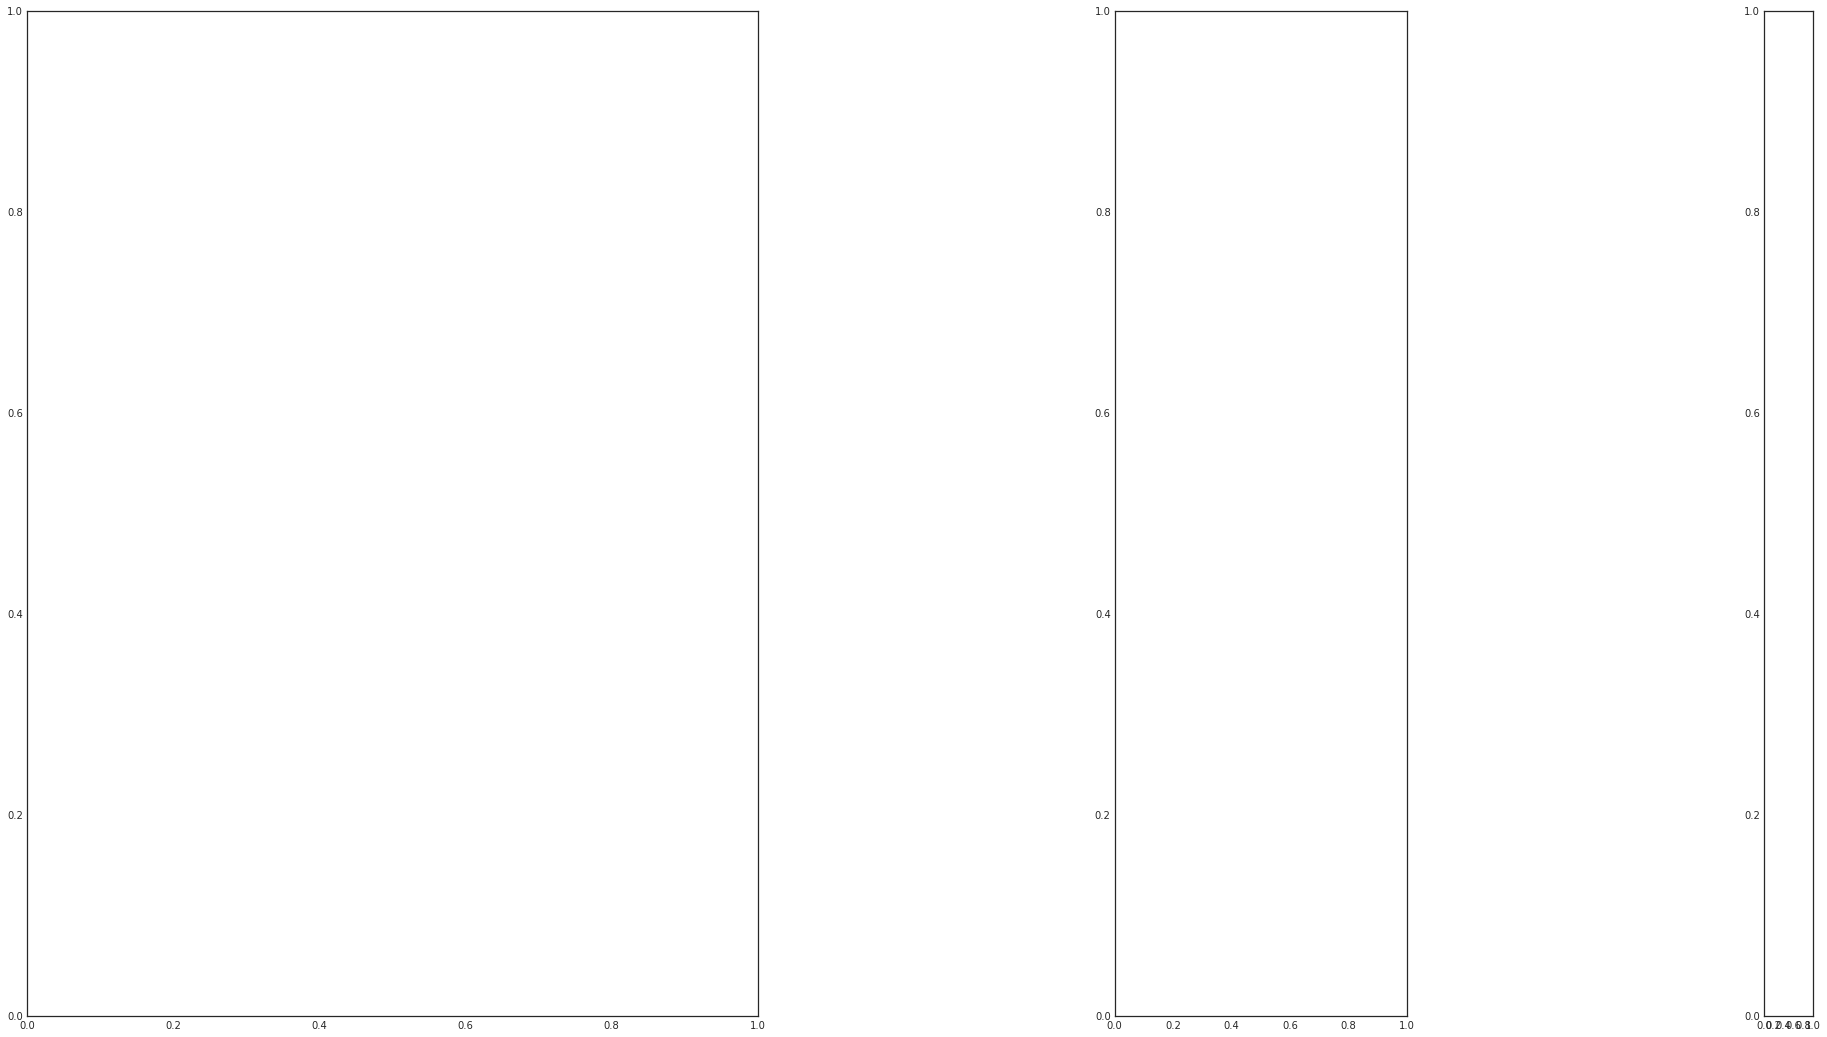

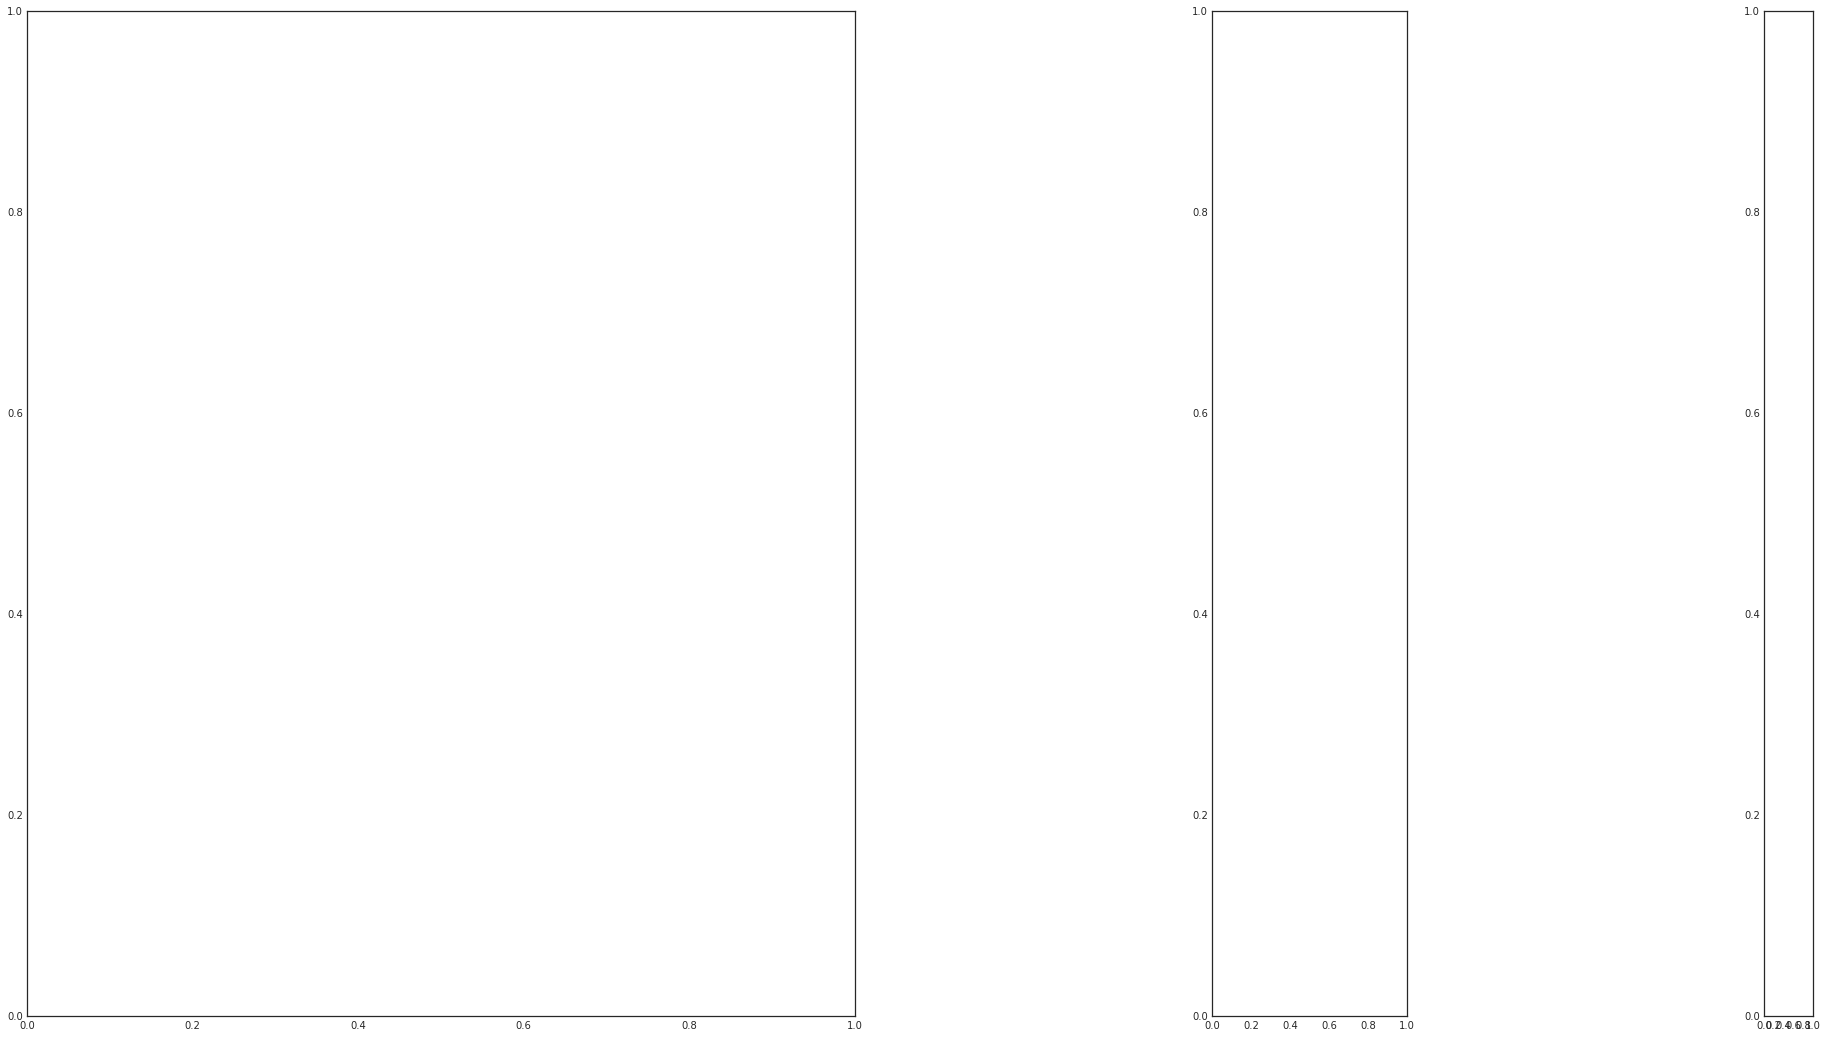

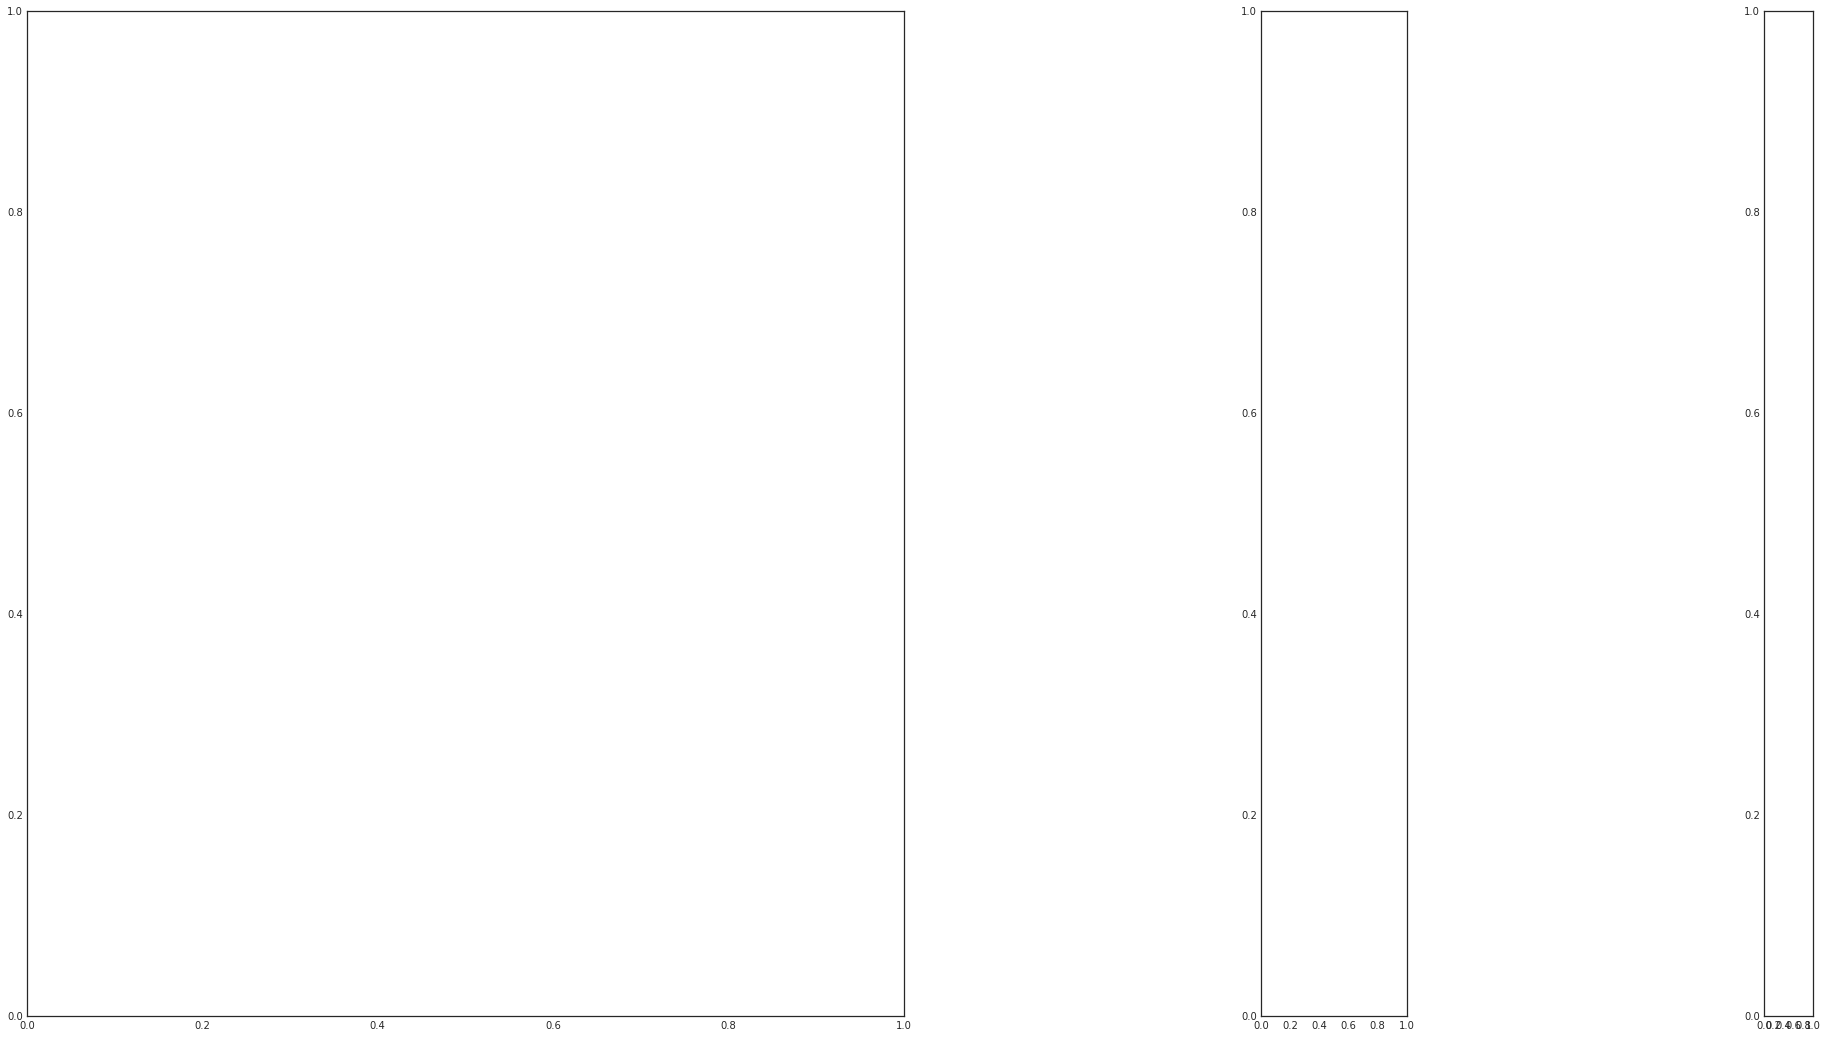

In [18]:
%mml .render_crosscat --subsample=50 --yticklabelsize=x-small --rowlabels=Name satellites_m 2
%mml .render_crosscat --subsample=50 --yticklabelsize=x-small --rowlabels=Name satellites_m 3
%mml .render_crosscat --subsample=50 --yticklabelsize=x-small --rowlabels=Name satellites_m 4

### Show dependence heatmap aggregating over the models.

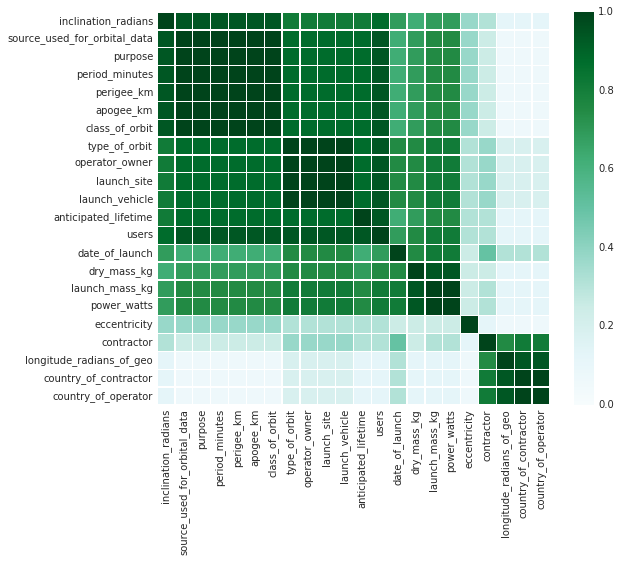

In [19]:
%bql .heatmap ESTIMATE DEPENDENCE PROBABILITY FROM PAIRWISE VARIABLES OF satellites;